In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bands = pd.read_csv('data/ma_bands_data.csv', index_col=0)
bands['theme'] = bands['theme'].fillna('')

songs = pd.read_csv('data/ma_songs_lyrics.csv', index_col=0)
songs = songs[  (songs['lyrics'] != '(lyrics not available)')
              & (songs['lyrics'] != '(Instrumental)')
              & ~songs['lyrics'].str.contains('[^\x00-\x7f]')]
songs = pd.merge(bands, songs, left_on='name', right_on='band_name')

In [2]:
songs

,name,url,genre,theme,label,country,location,status,date,years,album_url,band_name,album_name,album_type,song_name,song_id,lyrics
0,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Ace of Spades (Motörhead cover),803073,"If you like to gamble, I tell you I'm your man..."
1,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Bark at the Moon (Ozzy Osbourne cover),803063,SCREAMS BREAK THE SILENCE \r\nWAKING FROM THE ...
2,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Crazy Train (Ozzy Osbourne cover),803071,"All aboard, hah hah \r\n\r\nCrazy, but that's ..."
3,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Don't Talk to Strangers (Dio cover),803068,Don't talk to strangers \r\nMmmmh \r\n\r\nDon'...
4,$ilverdollar,https://www.metal-archives.com/bands/%24ilverd...,Heavy/Power Metal,"['Occult', ' Fantasy', ' Human issues']",NaN,Sweden,"Nyköping, Södermanland",Active,1996.0,1996-present,https://www.metal-archives.com/bands/%24ilverd...,$ilverdollar,Covers from Hell,Full-length,Freewheel Burning (Judas Priest cover),803070,Fast and furious \r\nWe ride the universe \r\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799759,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,Songs for Darkspirits,Full-length,"Sweet, Gesture of the Death",1150474,"slumber,\r\nPeace.\r\n\r\nthis harmony to natu..."
799760,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,When Fatigue Devours Reincarnation,EP,Diary of a Decaying Man,1150491,At the end of Chaos(The man who engulfed himse...
799761,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,흉가,Full-length,통곡의 서막 / Prelude to Tremendous Sadness,2213275,"my lady, wake up,\r\nin this cold night.\r\nyo..."
799762,폐허,https://www.metal-archives.com/bands/%ED%8F%90...,Dark Ambient/Atmospheric Black Metal,"['Nature', ' Anti-war', ' Sorrow', ' Depression']",NaN,"Korea, South",NaN,On hold,2001.0,2001-2015,https://www.metal-archives.com/bands/%ED%8F%90...,폐허,흉가,Full-length,흉가에 얽힌 이야기 Part III / The Tale from the Hounte...,2213273,Beauty was this hill\r\nfilled with this blood...


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, token_pattern="middle eastern|[0-9a-z'\-]+", min_df=1000,
                             stop_words=['metal', 'rock', "'n'", 'roll', 'early', 'mid', 'later',
                                         'and', 'elements', 'influences', 'various', 'with'])
genre_mat = vectorizer.fit_transform(songs['genre'])
genre_names = vectorizer.get_feature_names_out()
print(genre_names)

['alternative' 'ambient' 'atmospheric' 'avant-garde' 'black' 'blackened'
 'brutal' 'crossover' 'crust' 'dark' 'death' 'deathcore' 'depressive'
 'doom' 'drone' 'electronic' 'epic' 'experimental' 'extreme' 'folk'
 'funeral' 'goregrind' 'gothic' 'grindcore' 'groove' 'hard' 'hardcore'
 'heavy' 'industrial' 'melodic' 'metalcore' 'neoclassical' 'noise'
 'nu-metal' 'nwobhm' 'pagan' 'post-black' 'post-metal' 'power'
 'progressive' 'psychedelic' 'punk' 'raw' 'slam' 'sludge' 'southern'
 'speed' 'stoner' 'symphonic' 'technical' 'thrash' 'viking']


Firstly, I extract the top 15 most occuring genre names. It is assumed that all songs by one band would be under the same genre.

In [3]:
genre_sum = genre_mat.sum(axis=0)
top_genres = np.argsort(genre_sum)[0, -1 : -16 : -1]
print(top_genres[0])
print(genre_names[top_genres])
print((genre_sum[0, top_genres] / songs.shape[0]))

[[10 50  4 27 38 29 13 39 23 46 22 24  6 48 25]]
[['death' 'thrash' 'black' 'heavy' 'power' 'melodic' 'doom' 'progressive'
  'grindcore' 'speed' 'gothic' 'groove' 'brutal' 'symphonic' 'hard']]
[[0.3566102  0.23623219 0.21140862 0.17797375 0.09440785 0.09241351
  0.07428691 0.07104221 0.03624569 0.03446142 0.03313352 0.03107417
  0.03009638 0.02739058 0.02723428]]


Since one song could have multiple genre labels, I will consider whether a song belongs to each genre or not (binary classification with respect to each genre).

As the data is highly imbalanced when considering the fraction of songs belonging to any individual genre, an undersampling is done to the songs not belonging to that genre.

In [3]:
from sklearn.model_selection import train_test_split

def balance(X, y):
    not_belong_pos = np.flatnonzero(~y)
    belong_pos = np.flatnonzero(y)
    np.random.seed(0)
    not_belong_pos = np.random.choice(not_belong_pos, belong_pos.shape[0], replace=False)
    sample_pos = np.concatenate((not_belong_pos, belong_pos))

    X = X[sample_pos]
    y = np.concatenate((np.zeros(not_belong_pos.shape[0], dtype=y.dtype),
                              np.ones(belong_pos.shape[0], dtype=y.dtype)))
    return X, y

def get_train_test(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y.toarray().ravel(),
                                                        test_size=test_size,
                                                        random_state=0)
    
    X_train, y_train = balance(X_train, y_train)

    # print('Sample size:', not_belong_pos.shape[0], '+', belong_pos.shape[0])

    return X_train, X_test, y_train, y_test

# Tuning the vectorizer

I score the performance of using multinomial naive bayes on each genre. Measuring the performance with the scoring function provided by the model is not good, as it simply calculates the fraction of the correctly classified data, which does not represent the performance on unbalanced data well. Instead, I prefer to use Matthews correlation coefficient, which is a better metric for the performance using unbalanced data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

for genre_pos in np.asarray(top_genres).ravel():
    sample = songs['lyrics'].sample(50000, random_state=0)

    vectorizer = TfidfVectorizer(smooth_idf=False)
    lyrics_mat = vectorizer.fit_transform(sample)

    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

    mnb = MultinomialNB()
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    print(f'{genre_pos: <10}{genre_names[genre_pos]: <15} \
            {mnb.score(X_test, y_test): <10}{matthews_corrcoef(y_test, y_pred)}')

In [ ]:
# Word frequency nephogram 
from matplotlib import pyplot as plt
from wordcloud import WordCloud
for genre_pos in np.asarray(top_genres).ravel():
    print(f'{genre_pos: <10}{genre_names[genre_pos]: <15} ')
    df = songs[songs["pred"] == genre_pos]
    string=str(df[df["pred"] == genre_pos]["lyrics"])
    # Draw the word cloud picture of the movie nephogram
    #  Cloud picture of lyrics of each category 
    wordcloud = WordCloud(background_color='white',
                          max_words=10000, 
                          width=1000,
                          height=1000).generate(string)
    #  # Generate word cloud and show  
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()
    # The number of active bands in each major category in different years. 
    df["date"].value_counts().sort_index().plot()
    plt.title(genre_names[genre_pos])
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

genre_pos = 4

for ngram_low in range(1, 4):
    for ngram_high in range(ngram_low, 4):
        sample = songs['lyrics'].sample(50000, random_state=0)

        vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(ngram_low, ngram_high))
        lyrics_mat = vectorizer.fit_transform(sample)

        X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

        mnb = MultinomialNB()
        y_pred = mnb.fit(X_train, y_train).predict(X_test)
        print(f'({ngram_low}, {ngram_high}) {matthews_corrcoef(y_test, y_pred)}')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

genre_pos = 4

for stop_words in (None, 'english'):
    sample = songs['lyrics'].sample(50000, random_state=0)

    vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), stop_words=stop_words)
    lyrics_mat = vectorizer.fit_transform(sample)

    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

    mnb = MultinomialNB()
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    print(f'{str(stop_words):<10}{matthews_corrcoef(y_test, y_pred)}')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef

genre_pos = 4

for max_df_10 in range(1, 11, 1):
    sample = songs['lyrics'].sample(50000, random_state=0)

    vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=max_df_10 / 10)
    lyrics_mat = vectorizer.fit_transform(sample)

    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

    mnb = MultinomialNB()
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    print(f'{max_df_10 / 10} {matthews_corrcoef(y_test, y_pred)}')

# Comparison of classifiers

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

genre_pos = 4

sample = songs['lyrics'].sample(10000, random_state=0)

vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=0.6)
lyrics_mat = vectorizer.fit_transform(sample)
lyrics_words = vectorizer.get_feature_names_out()
print(lyrics_mat.shape)

X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

(10000, 489038)


## 1. Multinomial naive bayes

0.28224282802325096


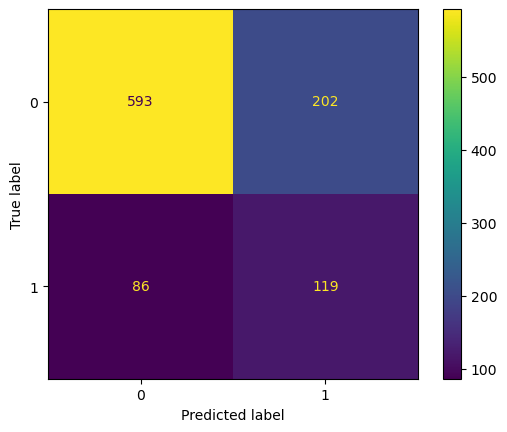

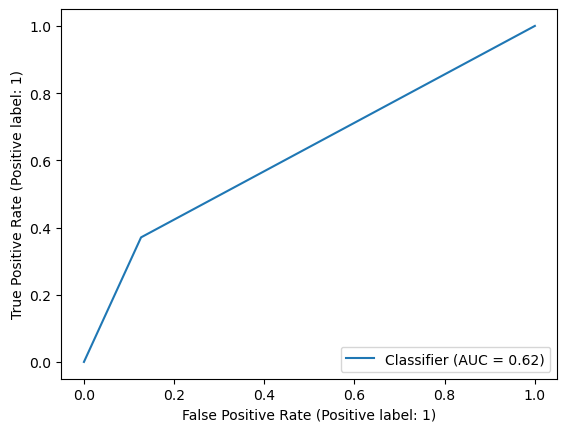

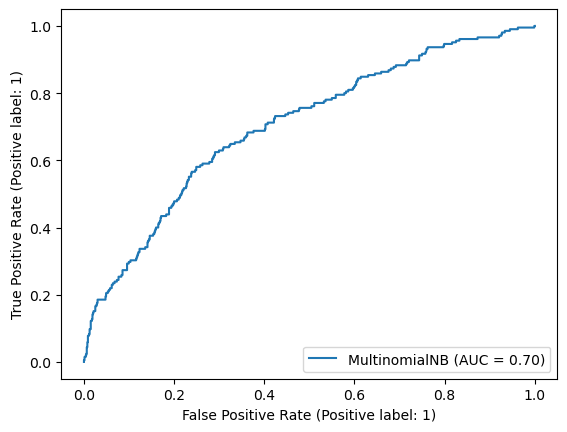

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_predictions(y_pred, y_test)
RocCurveDisplay.from_estimator(mnb, X_test, y_test);

## 2. Other classifiers

0.25285925226313144


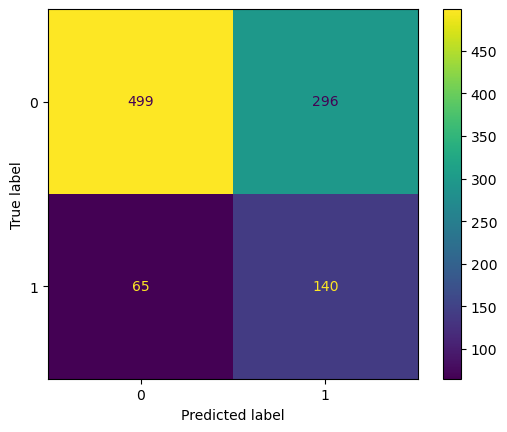

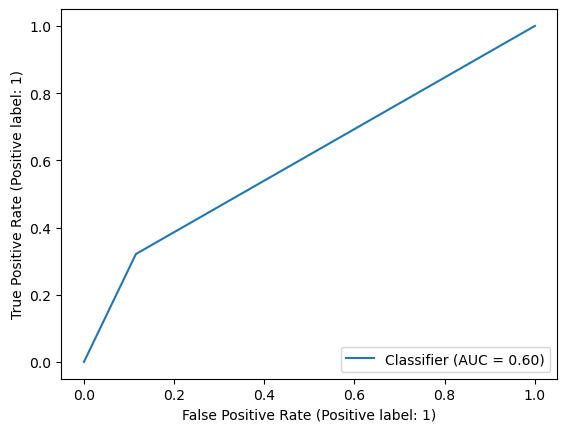

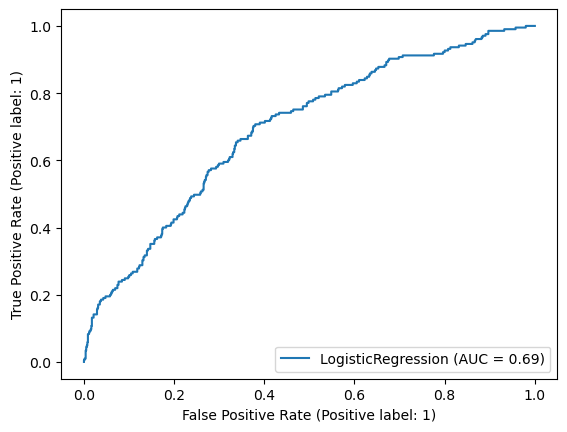

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

lr = LogisticRegression()
y_pred = lr.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_predictions(y_pred, y_test)
RocCurveDisplay.from_estimator(lr, X_test, y_test);

0.2209308549463086


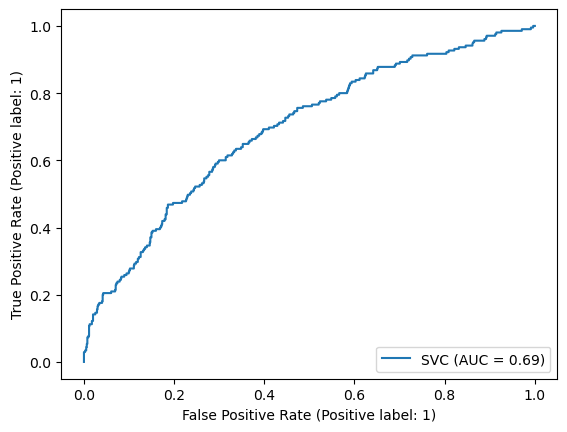

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

svc = SVC()
y_pred = svc.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

RocCurveDisplay.from_estimator(svc, X_test, y_test);

0.09462520478297869


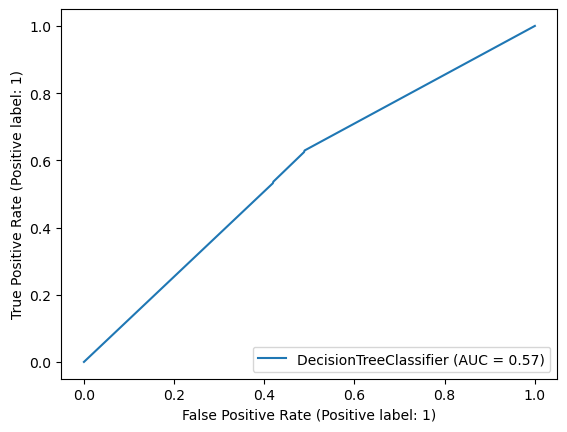

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

dtc = DecisionTreeClassifier()
y_pred = dtc.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

RocCurveDisplay.from_estimator(dtc, X_test, y_test);

0.20495443901458307


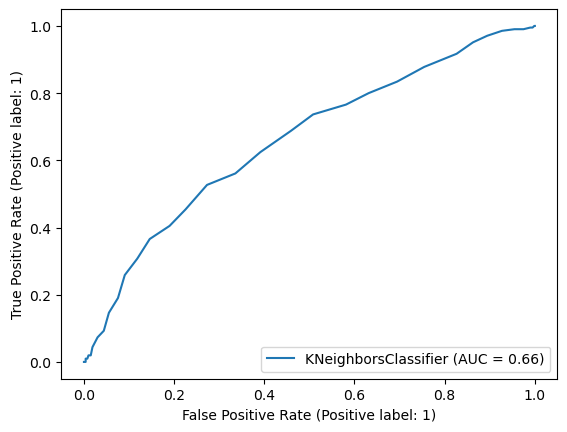

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

neigh = KNeighborsClassifier(n_neighbors=60)
y_pred = neigh.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

RocCurveDisplay.from_estimator(neigh, X_test, y_test);

# Tuning the classifer

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

genre_pos = 4

sample = songs['lyrics'].sample(200000, random_state=0)

vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=0.6)
lyrics_mat = vectorizer.fit_transform(sample)
lyrics_words = vectorizer.get_feature_names_out()
print(lyrics_mat.shape)

X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

(200000, 3635744)


## 1. Select features with high probability of occuring in different classes in naive bayes classification

0.2749220554493917
['you' 'my' 'your' 'me' 'we' 'it' 'for' 'will' 'all' 'this' 'no' 'that'
 'on' 'are' 'with' 'of the' 'be' 'from' 'can' 'they' 'in the' 'life' 'our'
 'now' 'by' 'as' 'what' 'time' 'so' 'death' 'one' 'but' 'see' 'their' 're'
 'he' 'his' 'there' 'll' 'have' 'not' 'don' 'blood' 'world' 'never' 'out'
 'am' 'when' 'to the' 'into' 'eyes' 'like' 'night' 'just' 'was' 'know'
 'through' 'pain' 'away' 'down' 'soul' 'feel' 'at' 'mind' 'die' 'her' 've'
 'come' 'way' 'up' 'has' 'take' 'end' 'light' 'only' 'you re' 'who'
 'where' 'us' 'from the' 'god' 'dead' 'again' 'she' 'do' 'day' 'an' 'more'
 'hell' 'on the' 'let' 'love' 'inside' 'black' 'here' 'them' 'fire' 'back'
 'for the' 'fear']
['you' 'my' 'your' 'me' 'we' 'of the' 'for' 'will' 'with' 'it' 'this'
 'all' 'from' 'are' 'in the' 'that' 'our' 'on' 'as' 'by' 'no' 'be' 'death'
 'they' 'life' 'blood' 'their' 'his' 'night' 'now' 'can' 'to the' 'am'
 'so' 'one' 'into' 'black' 'time' 'but' 'world' 'he' 'see' 'have' 'not'
 'through' 'go

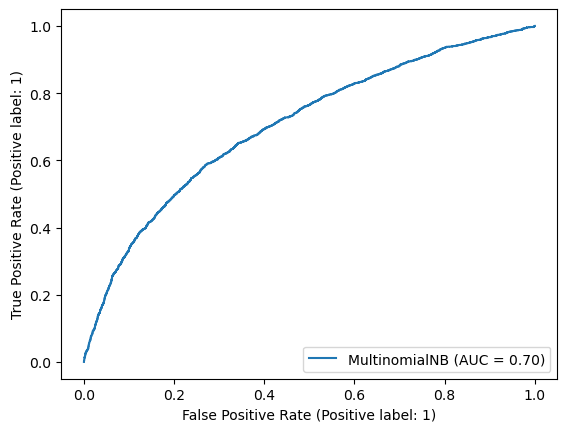

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

print(lyrics_words[mnb.feature_log_prob_[0].argsort()[-1 : -101 : -1]])
print(lyrics_words[mnb.feature_log_prob_[1].argsort()[-1 : -101 : -1]])
important_pos = np.union1d(mnb.feature_log_prob_[0].argsort()[-1 : -150000 : -1],
                           mnb.feature_log_prob_[1].argsort()[-1 : -150000 : -1])
print(important_pos.shape)

RocCurveDisplay.from_estimator(mnb, X_test, y_test);

0.26217089081330025


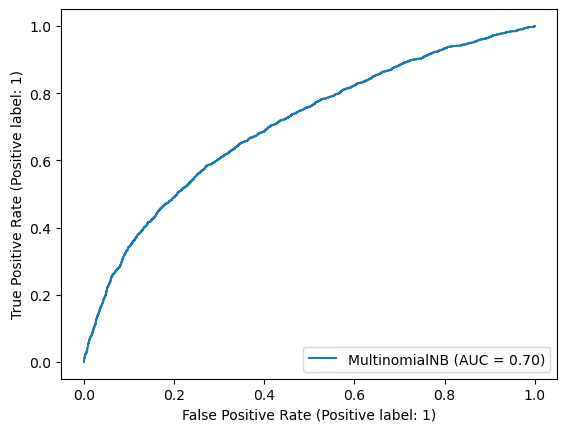

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

mnb = MultinomialNB()
y_pred = mnb.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos])
print(matthews_corrcoef(y_test, y_pred))

RocCurveDisplay.from_estimator(mnb, X_test[:, important_pos], y_test);

## 2. Select features with high importance in gradient boosted trees

0.2225201729900679
[2095348  793072 2373492 ...  600364  600370  600369]


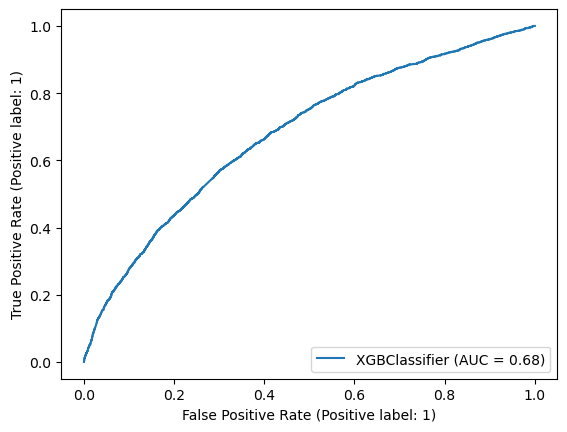

In [25]:
import xgboost as xgb
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

clf = xgb.XGBClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(matthews_corrcoef(y_test, y_pred))

important_pos = clf.feature_importances_.argsort()[-1 : -200000 : -1]
print(important_pos)

RocCurveDisplay.from_estimator(clf, X_test, y_test);

0.23456842928430519


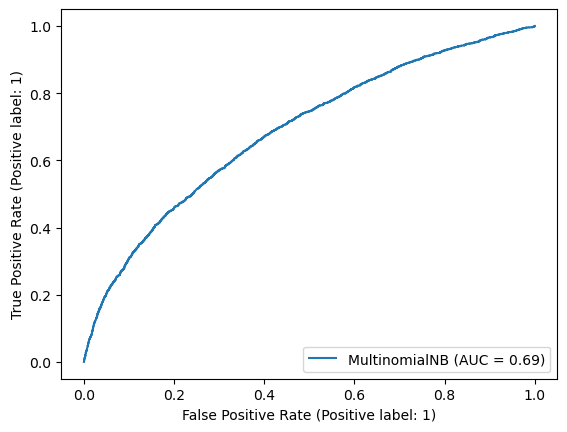

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

mnb = MultinomialNB()
y_pred = mnb.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos])
print(matthews_corrcoef(y_test, y_pred))

RocCurveDisplay.from_estimator(mnb, X_test[:, important_pos], y_test);

0.2417686183106927


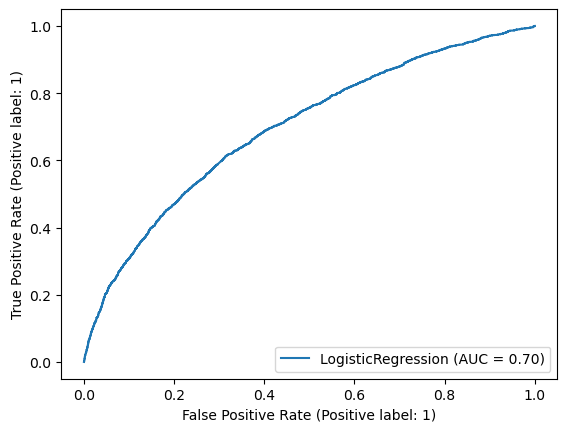

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

lr = LogisticRegression()
y_pred = lr.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos])
print(matthews_corrcoef(y_test, y_pred))

RocCurveDisplay.from_estimator(lr, X_test[:, important_pos], y_test);

## 3. Automatic version of method 1

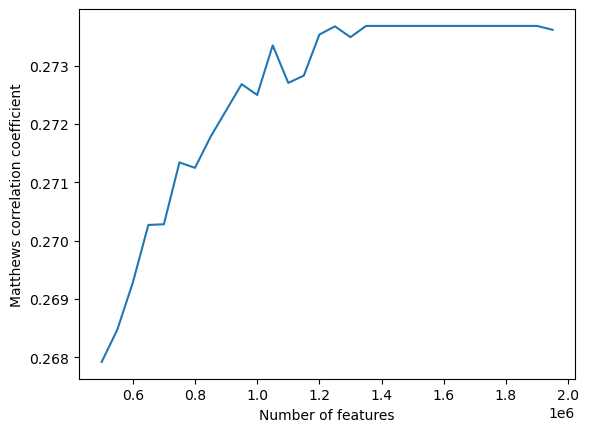

In [82]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

mnb_full = MultinomialNB()
y_pred = mnb_full.fit(X_train, y_train).predict(X_test)

def n_features_benchmark(x):
    y = list()

    for n_features in x:
#         print(n_features, end='\r')
        important_pos = np.union1d(mnb_full.feature_log_prob_[0].argsort()[-1 : -n_features - 1 : -1],
                                   mnb_full.feature_log_prob_[1].argsort()[-1 : -n_features - 1 : -1])
        mnb = MultinomialNB()
        y_pred = mnb.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos])
        y.append(matthews_corrcoef(y_test, y_pred))
        
    plt.xlabel('Number of features')
    plt.ylabel('Matthews correlation coefficient')
    plt.plot(x, y);

n_features_benchmark(range(500000, 2000000, 50000))

# Final model for black metal binary classification

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

genre_pos = 4

sample = songs['lyrics']

vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=0.6)
lyrics_mat = vectorizer.fit_transform(sample)
lyrics_words = vectorizer.get_feature_names_out()
print(lyrics_mat.shape)

X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

(799764, 7790187)


0.30654165059108934


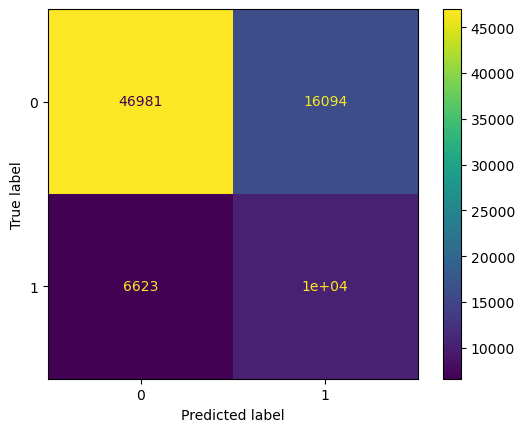

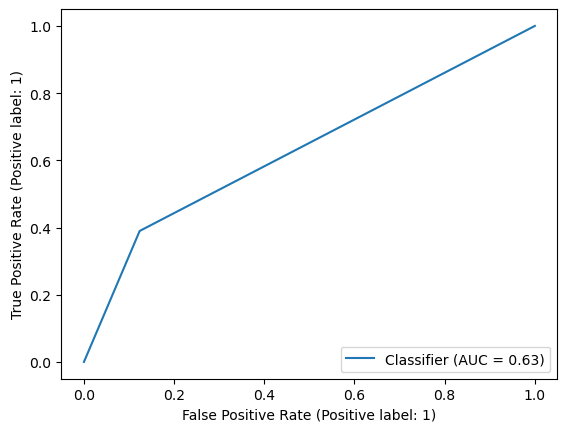

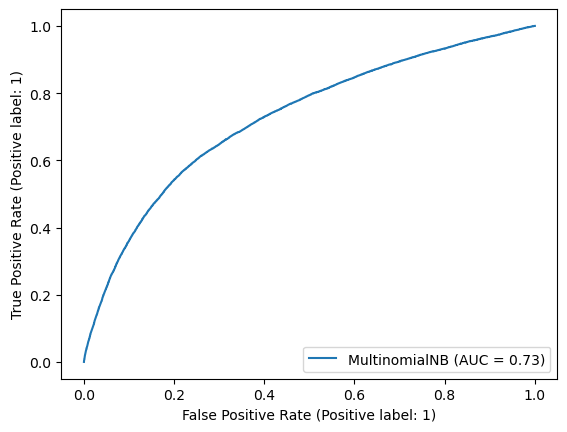

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)

n_features = 1400000
important_pos = np.union1d(mnb.feature_log_prob_[0].argsort()[-1 : -n_features - 1 : -1],
                                   mnb.feature_log_prob_[1].argsort()[-1 : -n_features - 1 : -1])
y_pred = mnb.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos])

print(matthews_corrcoef(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

RocCurveDisplay.from_predictions(y_pred, y_test)
RocCurveDisplay.from_estimator(mnb, X_test[:, important_pos], y_test);

## Ratio of songs from a band classified as black metal

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

def predict_band(name):
    train_pos = songs[songs['band_name'] != name].index
    test_pos = songs[songs['band_name'] == name].index
    
    genre_pos = 4
    X_train, y_train = balance(lyrics_mat[train_pos], genre_mat[train_pos, genre_pos].toarray().ravel())
    X_test, y_test = lyrics_mat[train_pos], genre_mat[test_pos, genre_pos].toarray().ravel()
    mnb = MultinomialNB()
    return mnb.fit(X_train[:, important_pos], y_train).predict(X_test[:, important_pos]).sum() / X_test.shape[0]
    
print(predict_band('Judas Priest'))
print(predict_band('Mercyful Fate'))
print(predict_band('Mayhem'))
print(predict_band('Immortal'))

0.2945580903157373
0.29355961368436717
0.2943546672070814
0.29569893818240045


Code from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

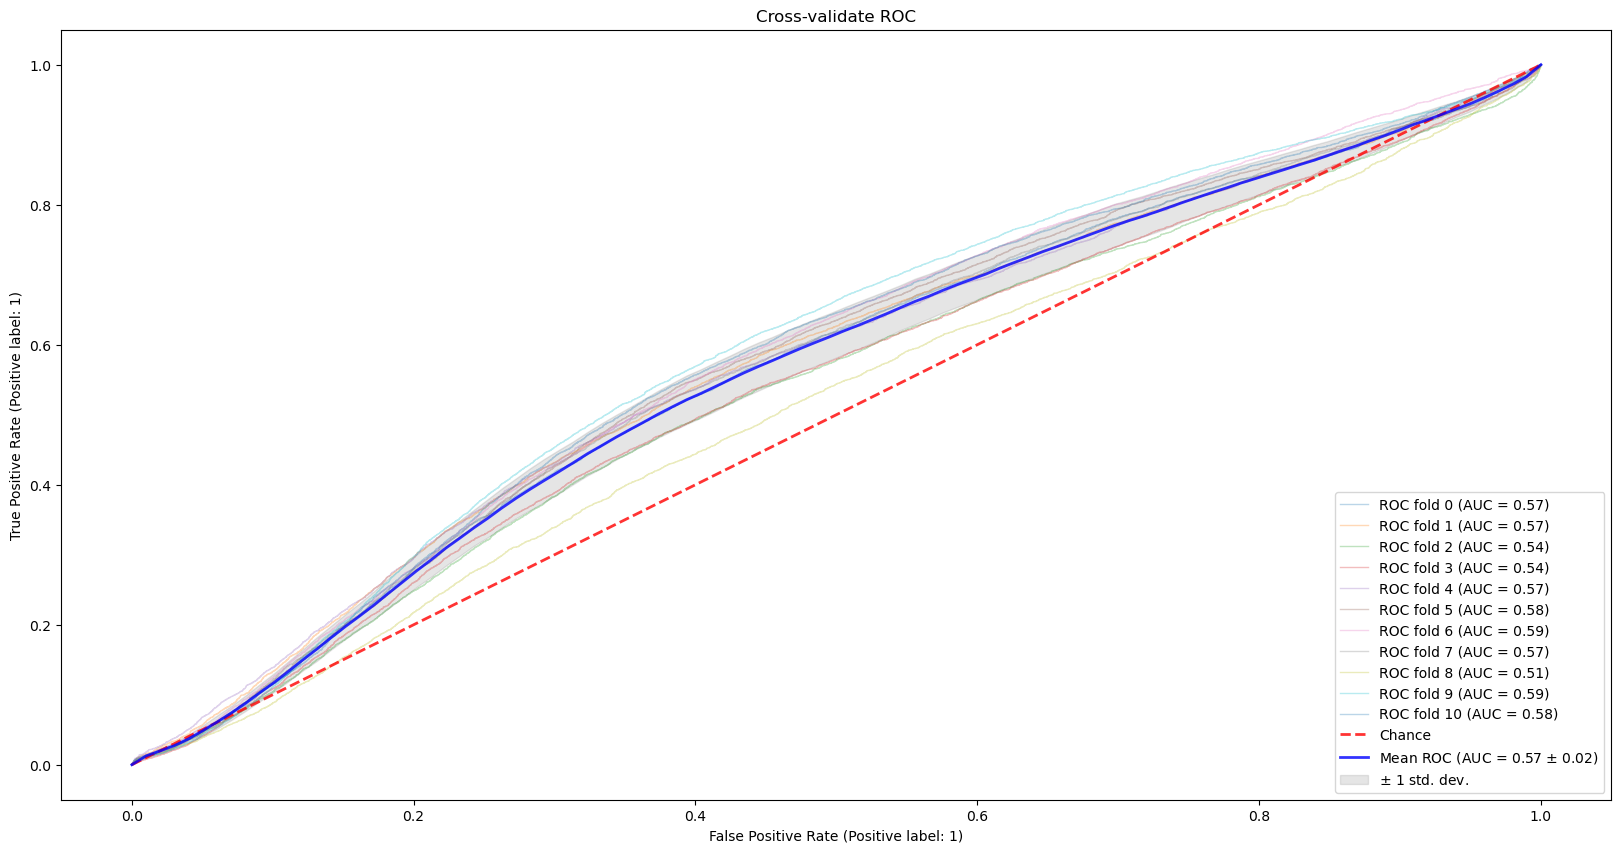

In [86]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=11)
X, y = balance(lyrics_mat, genre_mat[:, genre_pos].toarray().ravel())
X = X[:, important_pos]
classifier = mnb

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(20, 10))
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Cross-validate ROC",
)
ax.legend(loc="lower right")
plt.show()

# Neural network

In [ ]:
def activation(X,w,b):
    return (np.dot(X,w)+b)      

def loss(X,y, w, b):
    dif=y- activation(X, w,b)
    return np.sum(dif**2/(2*len(y)),keepdims=True)

def accuracy(X, y, w, b):
    pre = predict(X, w, b)
    return np.sum(np.where(pre==y,1,0))/len(y)    
 
def predict(X, w, b):
    result = np.int32(activation(X,w,b)+0.5)                         
    return result

def update(X, y, w, b, eta):  
    h =1e-4
    loss_origin = loss(X, y, w, b)                       # loss function
    delta_w=np.zeros_like(w) 
    delta_b=np.zeros_like(b) 
    
    for i in range(len(w)):
        tmp=w[i]
        w[i]+=h                                          
        loss_after=loss(X,y,w,b)                         
        delta_w[i] =eta*(loss_after - loss_origin)/h     
        w[i]=tmp 
        
    tmp=b 
    b += h                                                
    loss_after = loss(X, y, w, b)
    delta_b=eta*(loss_after-loss_origin)/h
    b=tmp
        
    w-=delta_w    
    b-=delta_b 
    
    #print('Delta:',delta_w,delta_b)
    return w,b

In [ ]:
for k in range(20): 
        weights, bias = update(x_train ,y_train, weights, bias,eta=0.01)

# Classification of genres within black metal

In [ ]:
is_black = (genre_mat[:, 4] == 1).toarray().ravel()
genre_sum = genre_mat[is_black].sum(axis=0)
top_genres = np.argsort(genre_sum)[0, -1 : -12 : -1]
print(top_genres[0])
print(genre_names[top_genres])
print((genre_sum[0, top_genres] / songs.shape[0]))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

sample = songs['lyrics'][is_black].sample(100000, random_state=0)

vectorizer = TfidfVectorizer(smooth_idf=False, ngram_range=(1, 2), max_df=0.6)
lyrics_mat = vectorizer.fit_transform(sample)
lyrics_words = vectorizer.get_feature_names_out()
print(lyrics_words)

for genre_pos in np.asarray(top_genres).ravel():
    if genre_pos == 4: continue
    
    X_train, X_test, y_train, y_test = get_train_test(lyrics_mat, genre_mat[sample.index, genre_pos], 0.1)

    mnb = MultinomialNB()
    y_pred = mnb.fit(X_train, y_train).predict(X_test)
    print(f'{np.asarray(genre_names).ravel()[genre_pos]:<15}{matthews_corrcoef(y_test, y_pred)}')
    
    RocCurveDisplay.from_estimator(mnb, X_test, y_test)